In [144]:
import api_keys
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import seaborn as sns



#math stuff - may or may not use
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import linear_harvey_collier
from statsmodels.stats.diagnostic import spec_white

In [151]:
sp = spotipy.Spotify(
    client_credentials_manager = SpotifyClientCredentials(
        client_id=api_keys.CLIENT_ID,
        client_secret=api_keys.CLIENT_SECRET
    )    
)

def get_the_playlists(date,offset):
    '''
    Get playlist ids for a particular day
    Inputs: date in ISO-8601 format
            offfset - page number
    Output: paired playlist ids with number of tracks
    '''
    return {i['id']:i['tracks']['total'] for i in sp.featured_playlists(
        locale=None,
        country='US',
        timestamp=date,
        limit=50,
        offset=offset*50
    )['playlists']['items']}
    
def get_playlist_tracks(id_):
    '''
    Get the tracks for a spotify playlist.
    Input: playlist ID
    Output: list of song IDs
    '''
    return [i['track']['id'] for i in sp.user_playlist('spotify',id_)['tracks']['items']]

def get_song_features(ids):
    '''
    Get song features for each song in a list
    '''
    return pd.DataFrame(sp.audio_features(_)[0] for _ in ids)

In [159]:
get_the_playlists('2015-01-01T00:00:00',0)

{'37i9dQZF1DXbcP8BbYEQaO': 71,
 '37i9dQZF1DX4sWSpwq3LiO': 221,
 '37i9dQZF1DX5DMh4a0MOAn': 55,
 '37i9dQZF1DX2yvmlOdMYzV': 126,
 '37i9dQZF1DX3Ogo9pFvBkY': 218,
 '37i9dQZF1DX0r3x8OtiwEM': 80,
 '37i9dQZF1DWT5MrZnPU1zD': 202,
 '37i9dQZF1DX5IDTimEWoTd': 77,
 '37i9dQZF1DWVEvzGeX3eRs': 47,
 '37i9dQZF1DX8WMG8VPSOJC': 55}

In [82]:
get_playlist_tracks('37i9dQZF1DWWBHeXOYZf74')[0:10]

['4PvbbMYL4fkToni5BLaYRb',
 '5fiR9Dy9hNXEPZOLo1kyNb',
 '1GZH9Sv6zCIse2GKihRHKy',
 '3vEOALYBUNQUMXpqhWx3hG',
 '6wE9qLKJu7DovH54rvrSVs',
 '3hMvsYZjU1pFH0xoywKXA9',
 '2LmQRj2QIzoyv9GcwGZslt',
 '3FsL491yGtc7Lwq1onHAsn',
 '5XR4V6uo2NCLkke1DyOcPY',
 '2urQEPkvz0ISpmqrKoSvwA']

In [87]:
sp.audio_features('5fiR9Dy9hNXEPZOLo1kyNb')

[{'danceability': 0.73,
  'energy': 0.634,
  'key': 2,
  'loudness': -5.116,
  'mode': 1,
  'speechiness': 0.297,
  'acousticness': 0.324,
  'instrumentalness': 6.16e-05,
  'liveness': 0.0712,
  'valence': 0.47,
  'tempo': 79.554,
  'type': 'audio_features',
  'id': '5fiR9Dy9hNXEPZOLo1kyNb',
  'uri': 'spotify:track:5fiR9Dy9hNXEPZOLo1kyNb',
  'track_href': 'https://api.spotify.com/v1/tracks/5fiR9Dy9hNXEPZOLo1kyNb',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5fiR9Dy9hNXEPZOLo1kyNb',
  'duration_ms': 219720,
  'time_signature': 4}]

In [167]:
trax = get_playlist_tracks('37i9dQZF1DX5DMh4a0MOAn')

df = pd.DataFrame(
    get_song_features(
        trax
    )
)

In [169]:
df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.0967,https://api.spotify.com/v1/audio-analysis/5wQr...,0.288,231453,0.21400,5wQrYiOblINes4hnDuRily,0.541,4,0.106,-11.846,0,0.0332,95.025,3,https://api.spotify.com/v1/tracks/5wQrYiOblINe...,audio_features,spotify:track:5wQrYiOblINes4hnDuRily,0.0563
1,0.9950,https://api.spotify.com/v1/audio-analysis/2aqt...,0.543,178882,0.03890,2aqtO1TsSu7sI9J3fGgRmj,0.906,9,0.143,-19.496,0,0.0654,76.869,4,https://api.spotify.com/v1/tracks/2aqtO1TsSu7s...,audio_features,spotify:track:2aqtO1TsSu7sI9J3fGgRmj,0.3460
2,0.9900,https://api.spotify.com/v1/audio-analysis/1gfz...,0.230,200000,0.05110,1gfzgfcrmkn2yTWuVGhCgh,0.852,6,0.377,-25.311,1,0.0469,176.782,3,https://api.spotify.com/v1/tracks/1gfzgfcrmkn2...,audio_features,spotify:track:1gfzgfcrmkn2yTWuVGhCgh,0.0483
3,0.9910,https://api.spotify.com/v1/audio-analysis/0Nkx...,0.320,273165,0.07730,0NkxSU0b1Jsw6yK2mJZru3,0.909,4,0.075,-27.053,0,0.0644,73.589,4,https://api.spotify.com/v1/tracks/0NkxSU0b1Jsw...,audio_features,spotify:track:0NkxSU0b1Jsw6yK2mJZru3,0.0368
4,0.9890,https://api.spotify.com/v1/audio-analysis/7hyA...,0.217,281120,0.00572,7hyAAjHZaDWSPDzlUYNUIa,0.925,2,0.109,-30.767,1,0.0394,85.279,4,https://api.spotify.com/v1/tracks/7hyAAjHZaDWS...,audio_features,spotify:track:7hyAAjHZaDWSPDzlUYNUIa,0.1740


In [171]:
df.columns

Index(['acousticness', 'analysis_url', 'danceability', 'duration_ms', 'energy',
       'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'track_href', 'type', 'uri',
       'valence'],
      dtype='object')

In [ ]:
features = [
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness'
    'liveness'
    'loudness'
    #mode
    'speechiness'
    #tempo
    #time_signature
    'valence'
]

other_features = [
    'key',
    'mode'
]

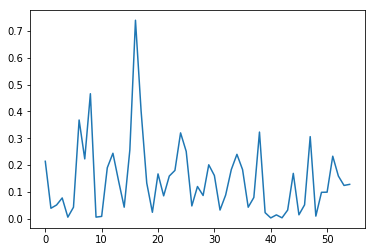

In [170]:
sns.lineplot(data = df['energy'])